In [ ]:
# Lendo a base de dados

from google.colab import files

uploaded = files.upload()

Saving SMSSpamCollection to SMSSpamCollection (1)


In [ ]:
# Tranformando o arquivo em um Dataframe

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['SMSSpamCollection (1)']), sep='\t')
df

,target,feature_space
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Ver quantos HAMs e quantos SPAMs (Balanceamento)

df.groupby('target').count()

,feature_space
target,
ham,4825
spam,747


In [ ]:
# Tranformando os targets em zeros ('ham') e ums ('spams')

df['target'] = df['target'].apply(lambda x: 0 if x == 'ham' else 1)
df

,target,feature_space
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
contagem_classses = df.groupby('target')['target'].count()
contagem_classses

,target
target,
0,4825
1,747


In [ ]:
!pip install scikit-learn==1.2.2

import numpy as np
from sklearn.model_selection import train_test_split

X = df['feature_space']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [1]:

from sklearn.feature_extraction.text import TfidfVectorizer

X_train_indices = X_train.index
X_test_indices = X_test.index

X_train_text = df['feature_space'].iloc[X_train_indices]
X_test_text = df['feature_space'].iloc[X_test_indices]

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

array([[<Axes: title={'center': '0'}>]], dtype=object)

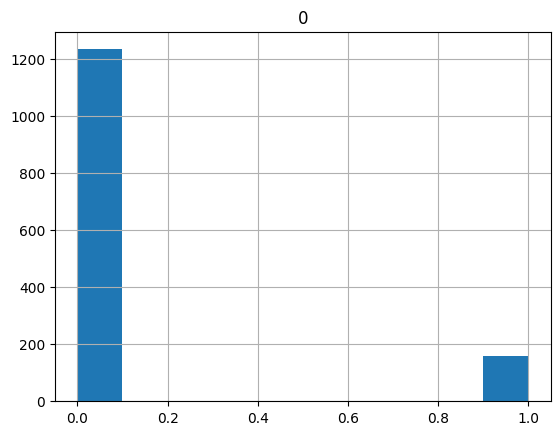

In [ ]:
y_pred = model.predict(X_test_tfidf)
df_pred = pd.DataFrame(y_pred)
df_pred.hist()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

Acurácia: 0.9813352476669059
Precisão: 1.0
Recall: 0.8602150537634409


In [ ]:
probas = model.predict_proba(X_test_tfidf)
probas

array([[1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.99, 0.01]])